In [1]:
#lets first import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])

# Portfolios

In this section we will learn how to do some basic math at portfolio level. You will know how to calculate return, expected return, and volatility given portfolio weights.


A portfolio is described by a set of assets and a set of weights invested in each asset.

## **Portfolio weights**

* The portfolio weight for stock $j$ , denoted $w_j$, is the fraction of a portfolio value held in stock $j$

  $$w_j=\frac{\text{Dollar held in stock j}}{\text{Dollar value of portfolio}}$$
  
* By construction, the portfolio weights allways add up to one: you invest all you got somewhere, and nothing more 

  * This doesn't mean that you can't borrow to invest, just means that you will have a negative weight somewhere offsetting the positive position in the other assets 
 
   $$\sum_{j=1}^N w_j=1$$
  
  * In matrix notation 
  
  $$\mathbf{1}'W=1$$
  
  * where $\mathbf{1}$ is a N by 1 vector of 1's (i.e. a vector with entry 1 in each position) and $W$ is the N by 1 vector of portfolio weights

## **Portfolio returns**

$$ r_p=\sum_{j=1}^N w_jr_j=W'R$$


* Where $R$ is the N by 1 vector of realized asset returns

* I use big R and big W here to emphasize that they are vectors, like  ($[r^{RF},r^{MKT},..]$), ($[w^{RF},w^{MKT},..]$),

* I use litlle $r_p$ becasue the return on a portfolio is just a scalar 


For example:

This below is the vector of return realization for a particular date 

In [2]:
Data.loc['1963-02']

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,NaN


* Since the return on a portfolio is a weighted sum of the returns on the securities, we need to determine how the distribution of this sum of r.v. ($R_p$) is related to the orignal distribution of eah r.v. (the individual securities returns $R_j$, $j=1...N$).

* The analysis of portfolio risk becomes much simpler by assuming that return distributions are normal.

* This means we only need to worry about mean and variance (even if we care about these really bad tail events)

In [3]:
# lets start by constructing an equal-weighted portfolio
W=np.ones(6)/6

W.shape
# W is a 6 by 1 matrix

(6,)

In [4]:
np.sum(W)

0.9999999999999999

In [5]:
Data.loc['9/2008']
# R is a 1 by 6 matrix

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
2008-09-30,0.0015,-0.0909,0.023693,-0.174897,-0.144244,-0.031262


In [6]:
Data.loc['9/2008'] @ W

Date
2008-09-30   -0.069352
dtype: float64

What do we do to construct the returns for all the months?

In [7]:
Data.shape

(647, 6)

In [8]:
Rp=Data @ W
Rp

Date
1963-02-28         NaN
1963-03-31    0.009196
1963-04-30   -0.015689
1963-05-31    0.002154
1963-06-30   -0.012909
                ...   
2016-08-31    0.002242
2016-09-30    0.003725
2016-10-31   -0.021774
2016-11-30   -0.024827
2016-12-31    0.004597
Length: 647, dtype: float64

<AxesSubplot:xlabel='Date'>

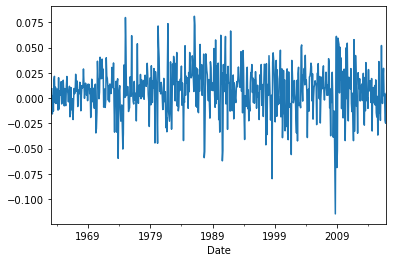

In [9]:
Rp.plot()

In [10]:
Rp.mean()

0.007367453311403502

## **Portfolio Expected returns**

* The expected return of a portfolio is the portfolio weighted average of the expected returns of the individual assets.


$$E[R_p]=E[\sum_{j=1}^N w_jr_j]=\sum_{j=1}^N w_jE[r_j]=W'E[R]$$


> Can you use the definition of expected values we learn in notebook 3 to verify that this is correct?


* Lets compute for our EW portfolio:

In [11]:
# To make sure we do the matrix multiplication correctly, it is good to see the shape of matrix first
print(W.shape)
print(Data.mean().shape)

(6,)
(6,)


In [12]:
# We use transpose function `T` to transpose W to a 1 by 6 matrix
W.T @ Data.mean()

0.007376761284897114

It should be true that taking the sample mean of our portfolio return realizations should give the same answer

In [13]:
(Data @ W).mean()

0.007367453311403502

or more directly

In [14]:
Rp.mean()

0.007367453311403502

## **Portfolio Variance**

Empirically the easiest way to compute the variance of a portfolio is to simply take the variance of the portfolio.

This returns to us the Realized variance of the portfolio in the sample

In [15]:
Rp.var()

0.000546192756487486

In [16]:
#or also

(Data @ W).var()

0.000546192756487486

When think about optimal portfolio construction is useful to have a way to go from the variance/covariances of the individual assets to variance of the portfolio

**Two asset case:**

$$Var(r_p)= Var(w_1r_1+w_2r_2)=Cov(w_1r_1+w_2r_2,w_1r_1+w_2r_2)$$

* where we used that $Var(x)=Cov(x,x)$

* We then distribute the terms

$$Cov(w_1r_1,w_1r_1+w_2r_2)+Cov(w_2r_2,w_1r_1+w_2r_2)=Cov(w_1r_1,w_1r_1)+Cov(w_2r_2,w_2r_2)+Cov(w_2r_2,w_1r_1)+Cov(w_1r_1,w_2r_2)$$

* This yields the classic formula

$$Var(r_p)= w_1^2Var(r_1)+2w_2w_1Cov(r_2,r_1)+w_2^2Var(r_2)$$

**N-asset case**

From the "term distribution"  above it is intuitive what the N asset case would look like


$$Var(r_p)= Var(\sum_{j=1}^N w_jr_j)=Cov(\sum_{j=1}^N w_jr_j,\sum_{i=1}^N w_ir_i)=\sum_{j=1}^N  w_j Cov(r_j,\sum_{i=1}^N w_ir_i)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)$$


* For a portfolio of 50 assets, this expression has 50 variance terms and 2450 covariance terms!



* We can write

$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$

* where $Cov(R)$ is the N by N variance covariance matrix of the assets and W is the vector of weights

*An aside*

* Why is this?

$$Var(r_p)=Var(W'R)=Cov(W'R,W'R)=W'Cov(R,W'R)=(W'Cov(R,W'R))'=Cov(W'R,R)W=W'Cov(R)W$$

* Where we used that covariance is a linear operator(can take constants out of it, one at a time) and that it is symmetric(cov(x,y)=cov(y,x)), so the covariance is a symmetic matrix X'=X.



In [17]:
print(W.shape)
print(Data.cov().shape)

(6,)
(6, 6)


In [18]:
Data.cov()

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
RF,6.942408e-06,-0.000002,0.000003,-0.000003,1.864051e-09,0.000004
MKT,-2.377807e-06,0.001936,0.000104,0.001280,1.254553e-03,0.000182
USA30yearGovBond,3.048525e-06,0.000104,0.001226,-0.000211,-1.662154e-05,0.000264
EmergingMarkets,-2.911724e-06,0.001280,-0.000211,0.003544,1.650762e-03,0.000243
WorldxUSA,1.864051e-09,0.001255,-0.000017,0.001651,2.174723e-03,0.000419
WorldxUSAGovBond,3.905048e-06,0.000182,0.000264,0.000243,4.191618e-04,0.000407


In [19]:
W @ Data.cov() @ W

0.0005455164562658994

We can check that this vector notation deliver the same as the double sum by using two for loops



$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$



In [20]:
cov=Data.cov()
covariance_sum=0 #initiate the sum at zero
for i in cov.index: # loop across all assets
    for j in cov.columns:
        i_pos=cov.index.get_loc(i) # this gets the position of the particular asset so we can locate the proper posiiton on the vector
        j_pos=cov.columns.get_loc(j) # same thing, but for the other asset in the double sum
        covariance_sum=covariance_sum+cov.loc[i,j]*W[i_pos]*W[j_pos]
        
        
covariance_sum

0.0005455164562658997

to get the volatility, i.e. , standard deviation:

In [21]:
(W.T@ Data.cov() @ W)**0.5

0.023356293718522624

Again, as we did before, the sample variance of the portfolio return realizations we constructed above should exactly match this:


In [22]:
Rp.std()

0.02337076713519447

**Takeways**

To compute the in sample variance of a portfolio you have two options

1. Compute the time-series the portfolio returns. This will give you one time-series whch you can simply compute the variance (".var()" method

2. You can estimate the covariance matrix across assets using .cov() method and apply the quadratic formula "W @ Data.cov() @ W"


They are identical approaches and produce the same result. 

Option 2 is easier and more intuitive , but option 1 is important to understand portfolio maximization which we will do soon

**A comment on sample moments vs populational moments**

We care about the population variance, i.e. what is the true variance of these assets going forward

We use the realized variance to the extent it help us estimate this.

Just like with average returns and expected returns

The key assumption, which tends to be ok over long time-peridos (say acorss years) is that the volatility is kind of stable, so we use the overall variance to gauge what the population is.

We will later discuss methods that deal with time-variation in these moments, but for now lets think as the population moments being constant

**dealing wiht the risk-free rate**

Again the risk-free rate is different, becasue as we discussed variation in the risk-free rate directly tracks what people expect to get from investing in the risk-free asset in different points in time, and not risk, so the formal way to think about it is what people call the Law of interated expectations


$$Var(R)=Var(E_t[R])+E(Var_t[R])$$

So the overal variance of a series is the sum of the vairance of what people expected at a point in time and the average value of the variance of the asset at a given point in time

For a risky asset, we think that there is very little variation in $E_t[R]$ so the overall variance is all risk.

For a risk-less asset, there is zero risk, so the second term is zero, and all the variantion of the asset is about variation in these expectations.

This means that is wrong to add the risk-free rate when you do variance calculations because you are attributing to risk, which is variation in what people expected to earn (and that is not risk)




**Diversification**

* A key concept in investing is diversification

* The famous: "don't put all your eggs in one basket" advice

* There are potential benefits of diversifcation for an investor when there are assets that  are imperfecly correlated with the investor portfolio

* So lets look at this from the vantage point of a US investors that is fully invested in the US equity market portfolio and is considering the benefits of investing in other world equity markets

In [23]:
# here is the co-movement across the asset
Data[['MKT','WorldxUSA']].corr()

,MKT,WorldxUSA
MKT,1.000000,0.611369
WorldxUSA,0.611369,1.000000


What is noteworthy about this correlation matrix? 

Are there any benefits of diversification?

Lets compute how the variance of the investor portfolio varies as she varies her portfolio weight on the world market

In [24]:
w=np.arange(0,1.05,0.05)
w

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [25]:
D=Data.loc[:,['MKT','WorldxUSA']]
UsW=[]
# w here is a vector of weights on the US MKT and 1-w is the the weight on the international market
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    # save the weight on the world market as the first element of UsW
    # save the vol of the investor's portfolio as the second element of UsW
    #UsW.append([1-x,((W.T @ D.cov() @ W)**0.5)*12**0.5])
    Rp=D@ W
    UsW.append([x,1-x,Rp.std()*12**0.5])
    

In [26]:
UsW=np.array(UsW)
# The first column of UsW is the weights on the US market
print(UsW[:,0])
# The second column of UsW is the weights on the World market
print(UsW[:,1])
# The third column of UsW is the vol of the portfolio
print(UsW[:,2])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[1.   0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35
 0.3  0.25 0.2  0.15 0.1  0.05 0.  ]
[0.16154465 0.15824199 0.15517892 0.15236987 0.14982914 0.14757059
 0.14560735 0.1439515  0.14261376 0.14160313 0.14092665 0.14058915
 0.14059308 0.14093839 0.1416226  0.14264082 0.14398597 0.145649
 0.14761916 0.14988433 0.15243138]


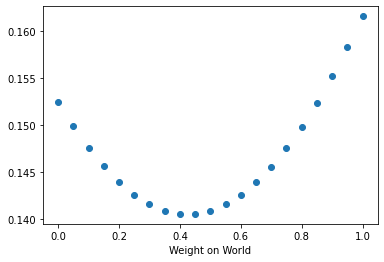

In [27]:
# Make a sacatter plot
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Weight on World')
#plt.ylim([0.04,0.05])
plt.show()

* We can also look at the investment frontier that such an investor faces: How her expected returns change with the variance

* Lets also look at annualized quantities for more intution

In [28]:
D.mean()*12

MKT          0.108621
WorldxUSA    0.096725
dtype: float64

In [29]:
D.std()*12**0.5

MKT          0.152431
WorldxUSA    0.161545
dtype: float64

In [30]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    # save the weight on the world market as the first element of UsW
    # save the annulized vol of the portfolio as the second element of UsW
    # save the annulized expected return of the portfolio as the third element of UsW
    UsW.append([1-x,(W.T @ D.cov() @ W*12)**0.5,W.T @ np.array(D.mean())*12])
UsW=np.array(UsW)

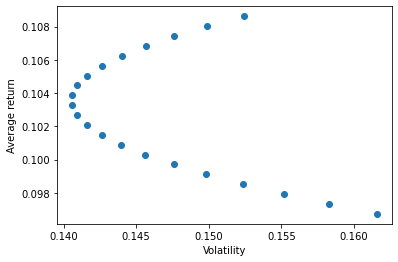

In [31]:
# UsW[:,1], the annulized vol of the portfolio
# UsW[:,2], the annulized expected return of the portfolio
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()


* Can you tell which extreme dot corresponds to each asset?

* How can you find out easily? 

In [32]:
D.mean()*12

MKT          0.108621
WorldxUSA    0.096725
dtype: float64

In [33]:
D.std()*12**0.5

MKT          0.152431
WorldxUSA    0.161545
dtype: float64

* For the world investors, clearly they can benefit of holding a bit of the US market-and this does not depend on the preferences for risk as they can get higher returns and lower volatility through diversification

* If you are a US investor and you are comfortable with the US market volatlity, why would you ever invest in an asset of lower expected return?



> Why might the US investor want to invest in the world market even if if has a lower expected return and higher variance?